In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:


# Sua coluna de transmissão
transmissao = df['transmission_type']

# Número de documentos (ou entradas) no DataFrame
n_docs = len(df)

idf = {}

# Usando drop_duplicates para obter valores únicos
unique_transmissao = transmissao.drop_duplicates()

for marcas in unique_transmissao:
    k = sum(marcas in df['transmission_type'][i] for i in range(n_docs))  # contagem de documentos que contêm esta marca
    idf[marcas] = np.log10(n_docs / (k + 1))  # Adicionei +1 para evitar divisão por zero


for transmissao, value in idf.items():
    print(f'{transmissao:>15}: {value:>10}')

         Manual: 0.14298399369863363
      Automatic: 0.5518073892282074


In [5]:
#Create id_marca: IDF

transmissao = df['transmission_type']

# Número de entradas no DataFrame
n_docs = len(df)

idf = {}

# valores únicos
unique_transmissao = transmissao.drop_duplicates()

for transmissao in unique_transmissao:
    k = sum(transmissao in df['transmission_type'][i] for i in range(n_docs))  # contagem de 1 tipo de combustível
    idf[transmissao] = np.log10(n_docs / (k + 1))  # evitar divisão por zero

# Criar nova coluna 'idf' no DataFrame
df['id_transmissao'] = df['transmission_type'].map(idf)

# Se desejar imprimir o DataFrame com a nova coluna
print(df)

                                               full_name registered_year  \
0                                2019 Tata Tiago XZ Plus        Nov 2019   
1                              2018 Honda WR-V i-VTEC VX        Apr 2018   
2                              2015 Honda City i VTEC SV        May 2015   
3      2021 Tata New Safari XZA Plus Adventure Editio...            2021   
4                        2019 Maruti Baleno 1.2 CVT Zeta        Jun 2019   
...                                                  ...             ...   
13951                          2021 Kia Carnival Premium            2021   
13952               2017 Hyundai i20 1.2 Magna Executive        Dec 2017   
13953             2017 Skoda Rapid 1.5 TDI Ambition BSIV        Jan 2018   
13954                      2017 Maruti Vitara Brezza ZDi        Apr 2017   
13955                         2015 Honda Amaze S i-Vtech        Mar 2015   

      engine_capacity              insurance transmission_type  kms_driven  \
0        

In [6]:
# Change the data types of multiple columns
df = df.astype({
    
    'id_transmissao': float
    
})



In [7]:
# Check data types
data_types = df.dtypes
print("Data type by column:")
print(data_types)

Data type by column:
full_name             object
registered_year       object
engine_capacity       object
insurance             object
transmission_type     object
kms_driven            object
owner_type            object
fuel_type             object
max_power             object
seats                float64
mileage               object
body_type             object
city                  object
resale_price_Lakh    float64
id_transmissao       float64
dtype: object


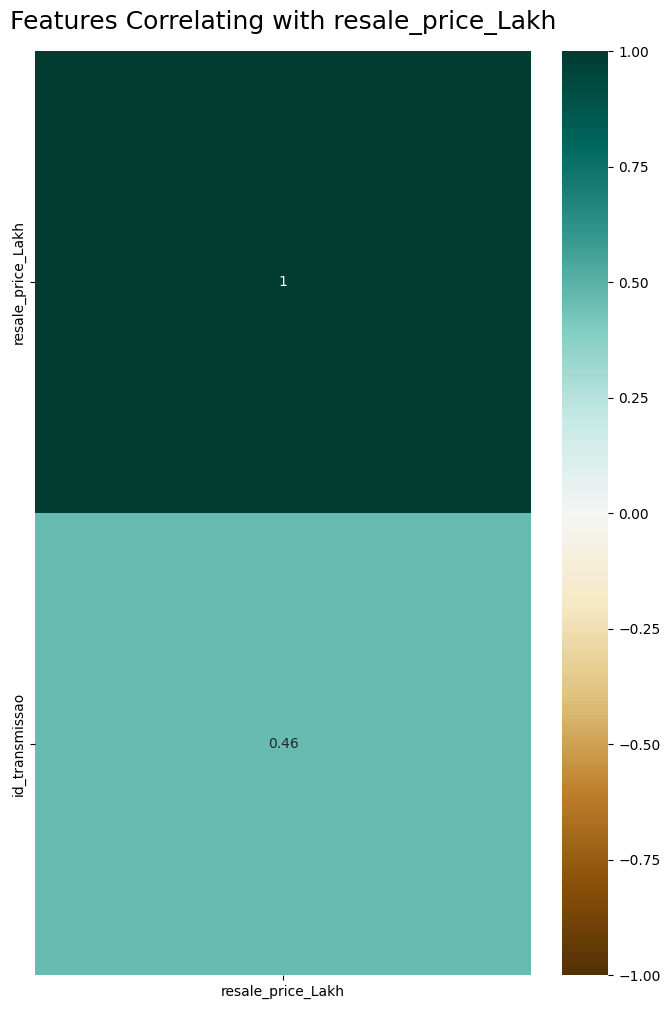

In [8]:
#correlation of all features with price

# Select columns
columns_of_interest = ['id_transmissao', 'resale_price_Lakh']
subset_df = df[columns_of_interest]

plt.figure(figsize=(8, 12))

# Creat heatmap
heatmap = sns.heatmap(subset_df.corr()[['resale_price_Lakh']].sort_values(by='resale_price_Lakh', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with resale_price_Lakh', fontdict={'fontsize': 18}, pad=16)

plt.show()